# 线性回归

使用 Python 做线性回归分析有好几种方式，常见的是用`statsmodels`包或者`sklearn`包。

假设有下面的数据存储在 excel 文件 line_regression.xlsx 中：

| 不良贷款  | 各项贷款余额 | 本年累计应收贷款 | 贷款项目个数 | 本年固定资产投资额 |
|-------|--------|----------|--------|-----------|
| 0\.9  | 67\.3  | 6\.8     | 5      | 51\.9     |
| 1\.1  | 111\.3 | 19\.8    | 16     | 90\.9     |
| 4\.8  | 173\.0 | 7\.7     | 17     | 73\.7     |
| 3\.2  | 80\.8  | 7\.2     | 10     | 14\.5     |
| 7\.8  | 199\.7 | 16\.5    | 19     | 63\.2     |
| 2\.7  | 16\.2  | 2\.2     | 1      | 2\.2      |
| 1\.6  | 107\.4 | 10\.7    | 17     | 20\.2     |
| 12\.5 | 185\.4 | 27\.1    | 18     | 43\.8     |
| 1\.0  | 96\.1  | 1\.7     | 10     | 55\.9     |
| 2\.6  | 72\.8  | 9\.1     | 14     | 64\.3     |
| 0\.3  | 64\.2  | 2\.1     | 11     | 42\.7     |
| 4\.0  | 132\.2 | 11\.2    | 23     | 76\.7     |
| 0\.8  | 58\.6  | 6\.0     | 14     | 22\.8     |
| 3\.5  | 174\.6 | 12\.7    | 26     | 117\.1    |
| 10\.2 | 263\.5 | 15\.6    | 34     | 146\.7    |
| 3\.0  | 79\.3  | 8\.9     | 15     | 29\.9     |
| 0\.2  | 14\.8  | 0\.6     | 2      | 42\.1     |
| 0\.4  | 73\.5  | 5\.9     | 11     | 25\.3     |
| 1\.0  | 24\.7  | 5\.0     | 4      | 13\.4     |
| 6\.8  | 139\.4 | 7\.2     | 28     | 64\.3     |
| 11\.6 | 368\.2 | 16\.8    | 32     | 163\.9    |
| 1\.6  | 95\.7  | 3\.8     | 10     | 44\.5     |
| 1\.2  | 109\.6 | 10\.3    | 14     | 67\.9     |
| 7\.2  | 196\.2 | 15\.8    | 16     | 39\.7     |
| 3\.2  | 102\.2 | 12\.0    | 10     | 97\.1     |

首先使用 pandas 读取 excel 数据：

In [1]:
import pandas as pd

# 读取 excel 数据，引号里面是 excel 文件在电脑的存储位置
datas = pd.read_excel('datas\linear_regression.xlsx')

In [2]:
datas.head()

,不良贷款,各项贷款余额,本年累计应收贷款,贷款项目个数,本年固定资产投资额
0,0.9,67.3,6.8,5,51.9
1,1.1,111.3,19.8,16,90.9
2,4.8,173.0,7.7,17,73.7
3,3.2,80.8,7.2,10,14.5
4,7.8,199.7,16.5,19,63.2


## `statsmodels` 做线性回归

完整代码如下：

                            OLS Regression Results                            
Dep. Variable:                 各项贷款余额   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     19.65
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           0.000191
Time:                        16:46:31   Log-Likelihood:                -136.90
No. Observations:                  25   AIC:                             277.8
Df Residuals:                      23   BIC:                             280.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.6902     22.378      1.640      0.1

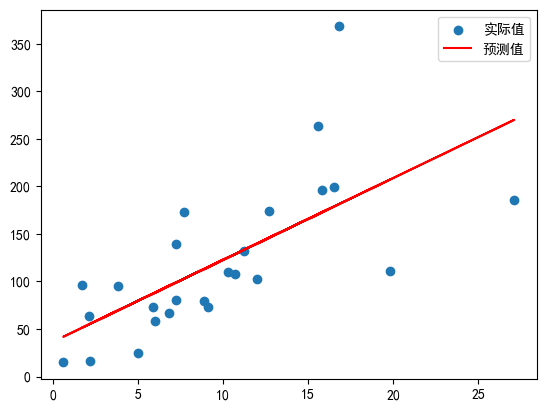

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

datas = pd.read_excel(r'datas\linear_regression.xlsx') # 读取 excel 数据，引号里面是 excel 文件的位置
y = datas.iloc[:, 1] # 因变量为第 2 列数据
x = datas.iloc[:, 2] # 自变量为第 3 列数据
x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果

# 画图
# 这两行代码在画图时添加中文必须用
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

predicts = model.predict() # 模型的预测值
x = datas.iloc[:, 2] # 自变量为第 3 列数据
plt.scatter(x, y, label='实际值') # 散点图
plt.plot(x, predicts, color = 'red', label='预测值')
plt.legend() # 显示图例，即每条线对应 label 中的内容
plt.show() # 显示图形